Epoch 1/5
235/235 [==============================] - 5s 16ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 3/5
235/235 [==============================] - 2s 11ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


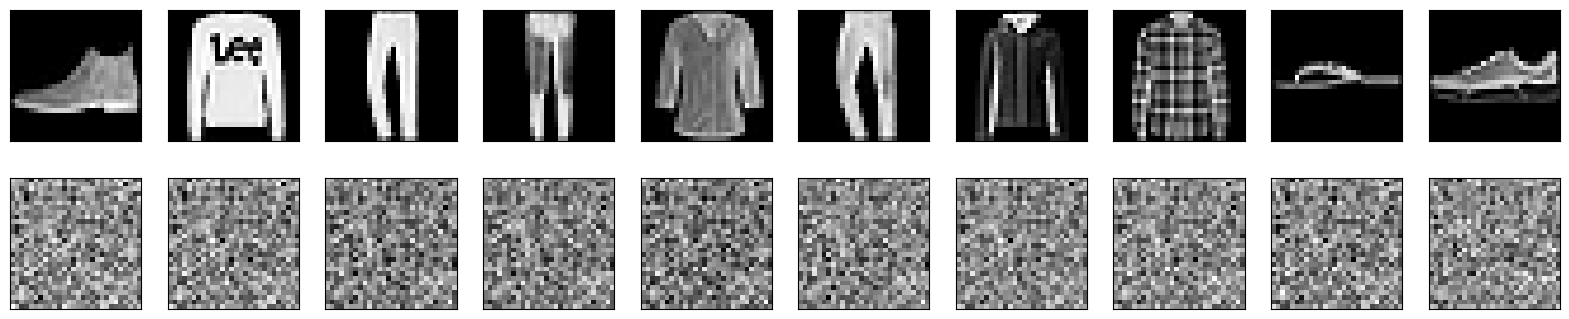

In [5]:
#auto encoder code
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Add one more hidden layer
encoding_dim_2 = 16
encoded_2 = Dense(encoding_dim_2, activation='relu')(encoded)
decoded_2 = Dense(encoding_dim, activation='relu')(encoded_2)
decoded = Dense(784, activation='sigmoid')(decoded_2)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load Fashion MNIST data
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict using the autoencoder
decoded_imgs = autoencoder.predict(x_test)

# Function to plot images
import matplotlib.pyplot as plt

def plot_images(original_imgs, decoded_imgs, num_imgs=10):
    n = num_imgs  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Plot some examples
plot_images(x_test, decoded_imgs, num_imgs=10)

Epoch 1/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6968 - val_loss: 0.6966
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6965 - val_loss: 0.6963
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6962 - val_loss: 0.6960
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6959 - val_loss: 0.6958
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6951 - val_loss: 0.6950
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


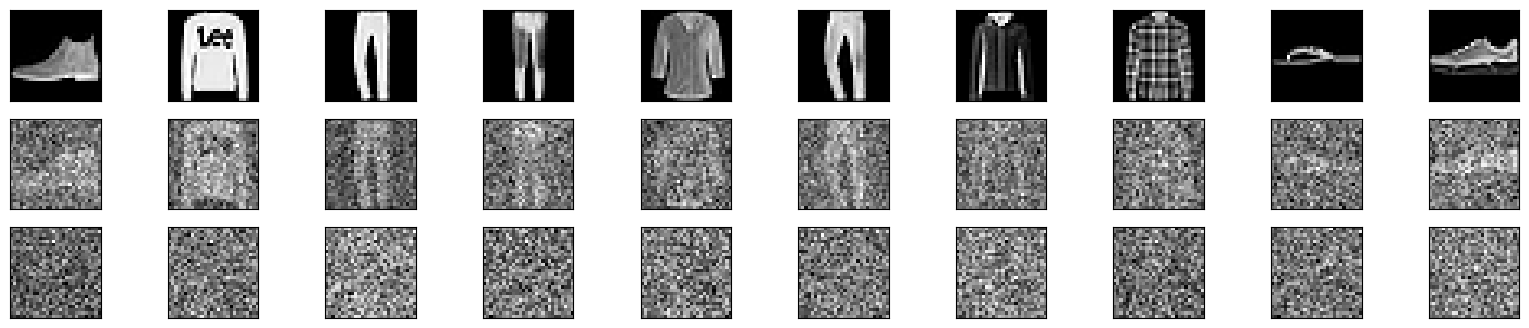

In [6]:
# denoisening autoencoder
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load Fashion MNIST data
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Predict using the autoencoder
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

# Function to plot images
import matplotlib.pyplot as plt

def plot_images(original_imgs, noisy_imgs, decoded_imgs, num_imgs=10):
    n = num_imgs  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display with noise
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(noisy_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Plot some examples
plot_images(x_test, x_test_noisy, decoded_imgs_noisy, num_imgs=10)